In [2]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.15.0


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
y_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

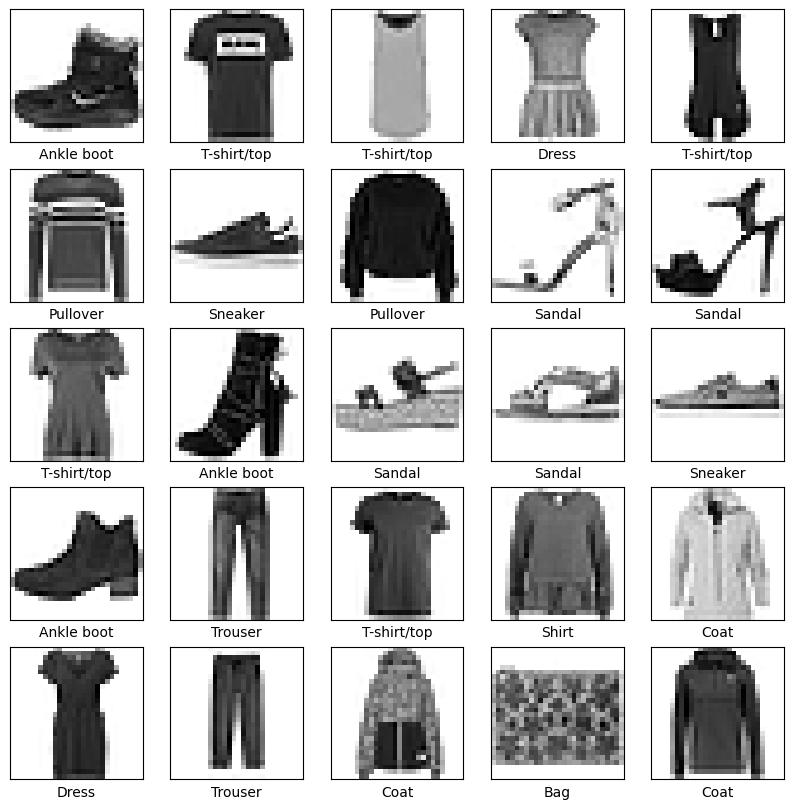

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_labels[y_train[i]])

plt.show()

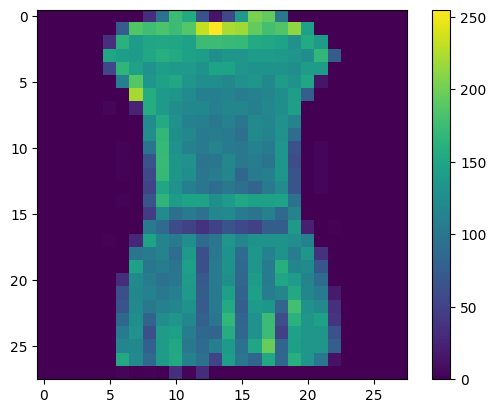

In [ ]:
plt.figure()
plt.imshow(x_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети важно перевести данные из диапазона от 0 до 255 в диапазон
от 0 до 1:

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [8]:
input_shape = (28, 28, 1)

In [12]:
def plot_image(index, predictions_array, true_label, image):
  predictions_array, true_label, image = predictions_array, true_label[index], image[index]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(y_labels[predicted_label],
                                       100 * np.max(predictions_array),
                                       y_labels[true_label]),
             color='blue' if predicted_label == true_label else 'red')

def plot_value_array(index, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[index]

  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

def predicion_show(predictions, index):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(index, predictions[index], y_test, x_test)
  plt.subplot(1,2,2)
  plot_value_array(index, predictions[index], y_test)
  plt.show()

def history_show(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(f"точность модели {round(max(history.history['accuracy']), 2)}")
  plt.ylabel('точность')
  plt.xlabel('количество эпох')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Потери модели')
  plt.ylabel('Потери')
  plt.xlabel('количество эпох')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def probability_show(predictions, x_test):
  for index in range(predictions.shape[1]):
    predicion_show(predictions, index)

Один сверточный и два полносвязных слоя

In [28]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

● Loss function — измеряет точность работы нейросети

● Optimizer — определяет способ корректировки весов

● Metrics — определяет, какие характеристики будут отражаться в процессе обучения

In [29]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [30]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_data = (x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4058 - accuracy: 0.8581 - val_loss: 0.3544 - val_accuracy: 0.8692
Epoch 2/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2775 - accuracy: 0.8988 - val_loss: 0.2994 - val_accuracy: 0.8902
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2370 - accuracy: 0.9123 - val_loss: 0.2709 - val_accuracy: 0.9026
Epoch 4/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2063 - accuracy: 0.9243 - val_loss: 0.3140 - val_accuracy: 0.8910
Epoch 5/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1827 - accuracy: 0.9323 - val_loss: 0.2664 - val_accuracy: 0.9072
CPU times: user 3min 59s, sys: 6.42 s, total: 4min 5s
Wall time: 3min 23s


313/313 [==============================] - 2s 7ms/step


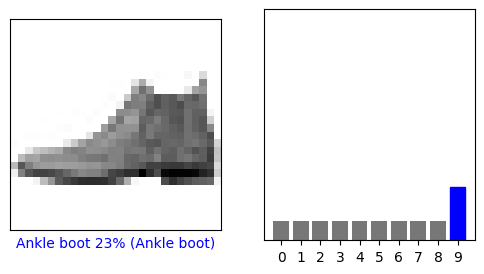

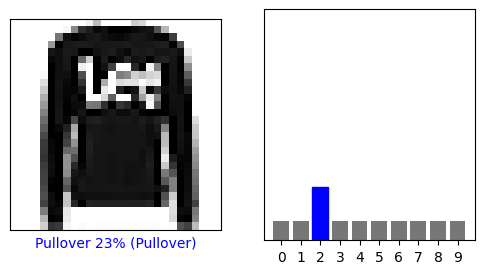

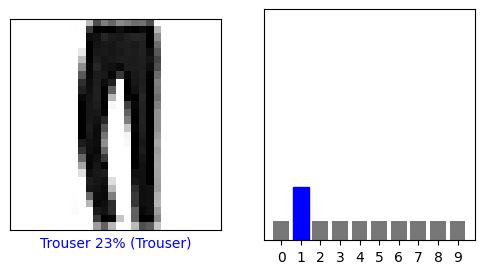

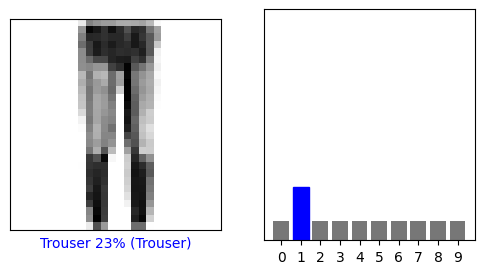

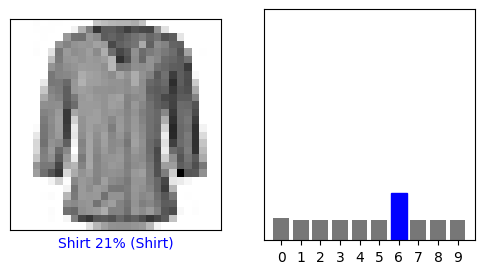

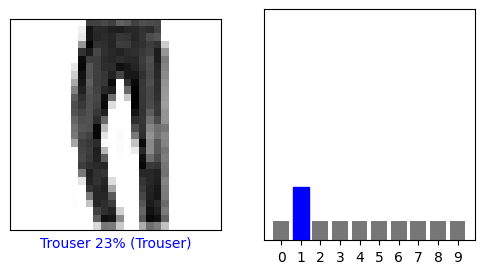

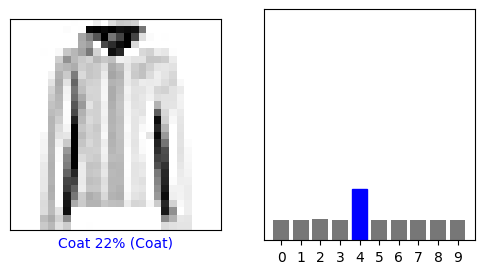

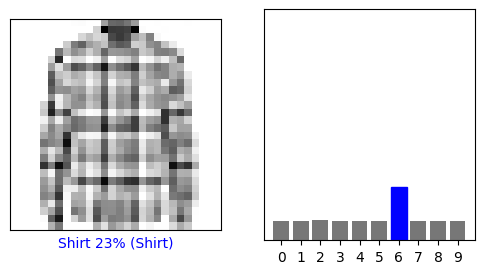

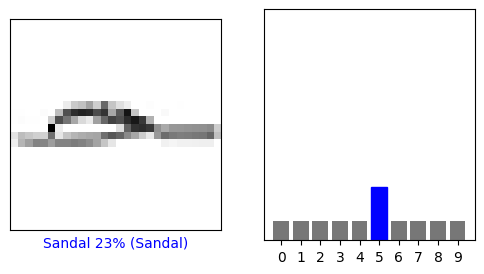

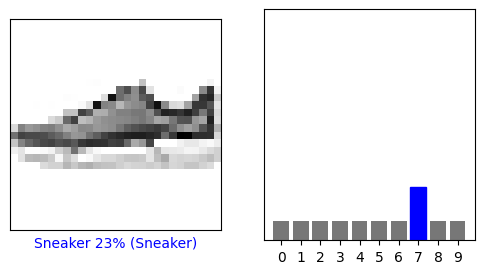

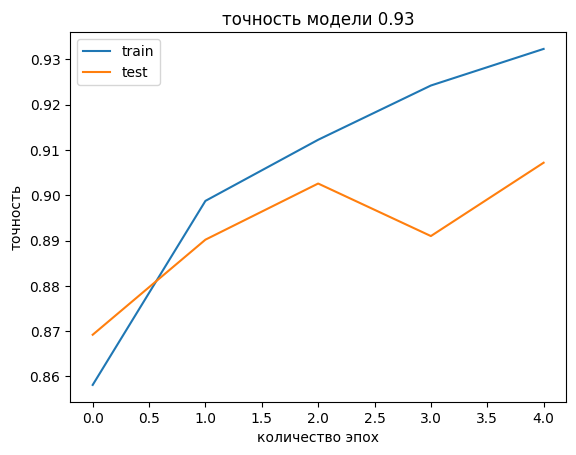

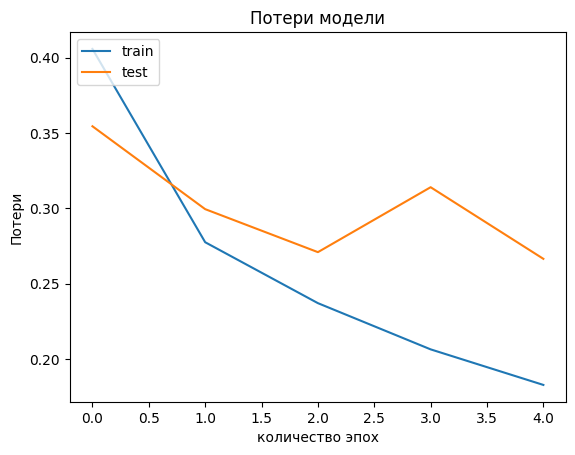

In [32]:
probability_show(tf.keras.Sequential([model_1, tf.keras.layers.Softmax()]).predict(x_test), x_test)
history_show(history)

Отсутствие сверточного слоя сильно ухудшает точность модели

In [48]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50, activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [49]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_data = (x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5383 - accuracy: 0.8155 - val_loss: 0.4642 - val_accuracy: 0.8395
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4057 - accuracy: 0.8566 - val_loss: 0.4135 - val_accuracy: 0.8549
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8697 - val_loss: 0.3805 - val_accuracy: 0.8655
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - accuracy: 0.8776 - val_loss: 0.3723 - val_accuracy: 0.8684
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3210 - accuracy: 0.8827 - val_loss: 0.3845 - val_accuracy: 0.8654
CPU times: user 23.9 s, sys: 2.64 s, total: 26.5 s
Wall time: 23.3 s


313/313 [==============================] - 0s 1ms/step


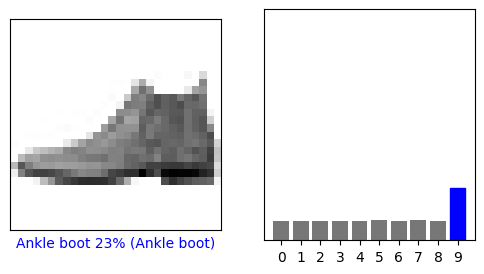

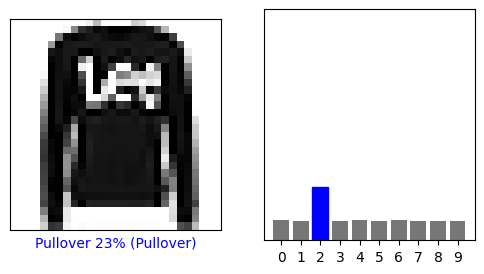

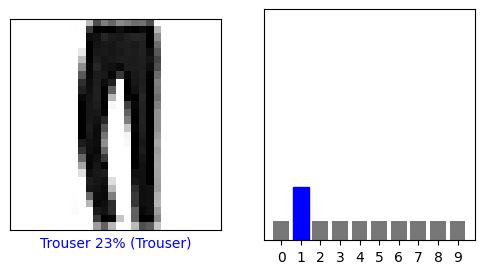

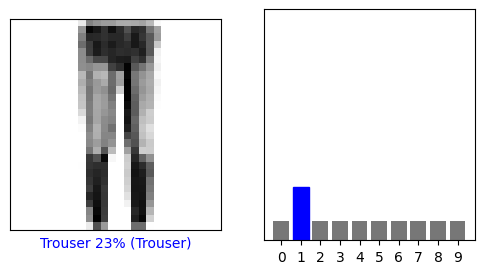

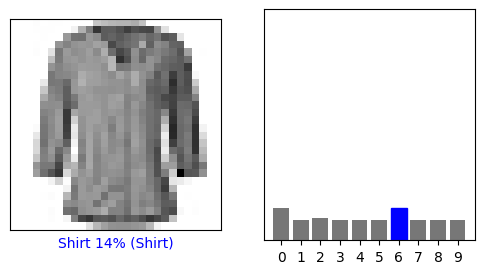

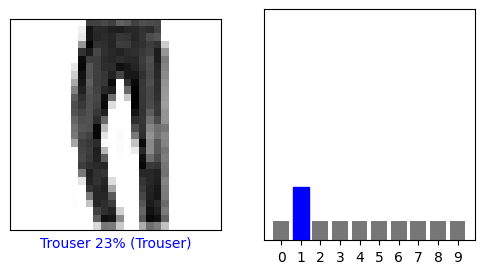

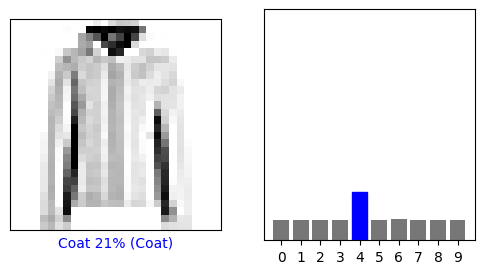

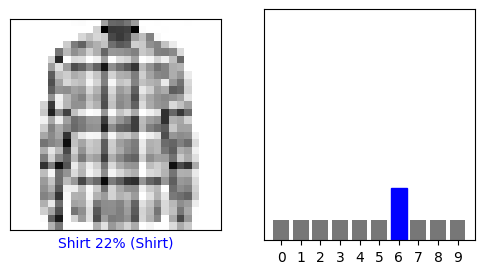

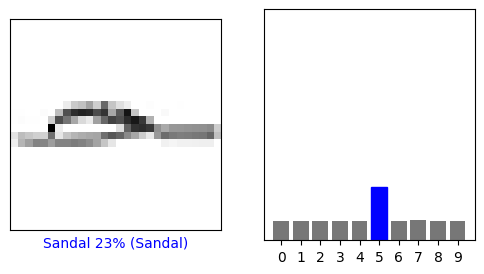

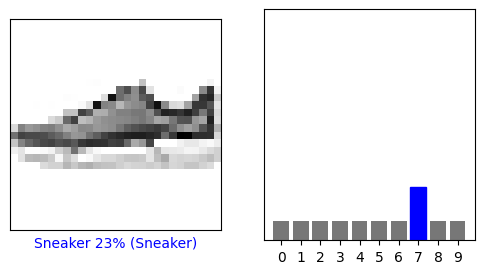

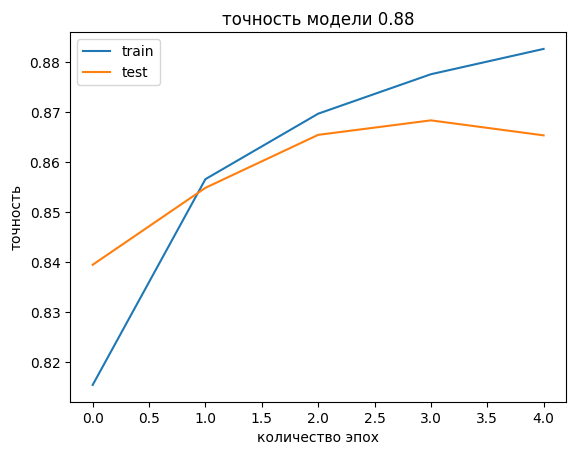

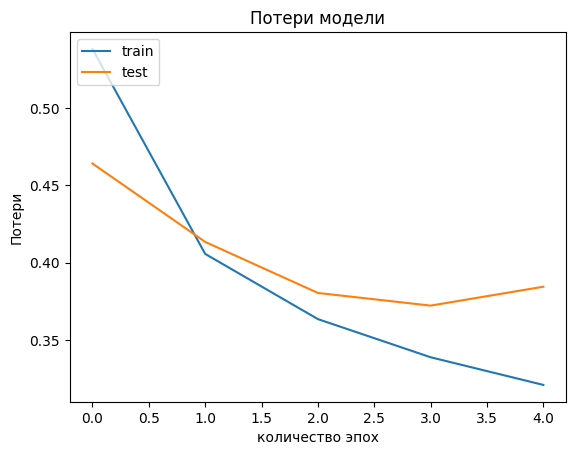

In [51]:
probability_show(tf.keras.Sequential([model_2, tf.keras.layers.Softmax()]).predict(x_test), x_test)
history_show(history)

Не значительное увеличение сверточных слоев дает небольшое улучшение качества модели

In [ ]:
model_3 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [ ]:
model_3.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_data = (x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1423 - accuracy: 0.9478 - val_loss: 0.2285 - val_accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1357 - accuracy: 0.9508 - val_loss: 0.2272 - val_accuracy: 0.9218
Epoch 3/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1318 - accuracy: 0.9525 - val_loss: 0.2338 - val_accuracy: 0.9224
Epoch 4/5
1875/1875 [==============================] - 76s 41ms/step - loss: 0.1295 - accuracy: 0.9535 - val_loss: 0.2325 - val_accuracy: 0.9203
Epoch 5/5
1875/1875 [==============================] - 76s 40ms/step - loss: 0.1271 - accuracy: 0.9542 - val_loss: 0.2374 - val_accuracy: 0.9204
CPU times: user 9min 23s, sys: 9.81 s, total: 9min 33s
Wall time: 6min 48s


313/313 [==============================] - 4s 12ms/step


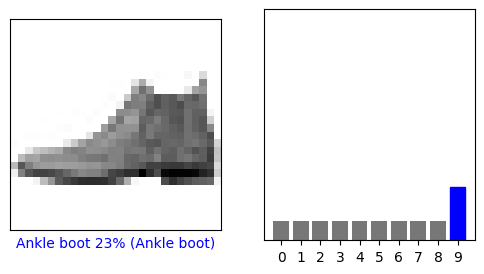

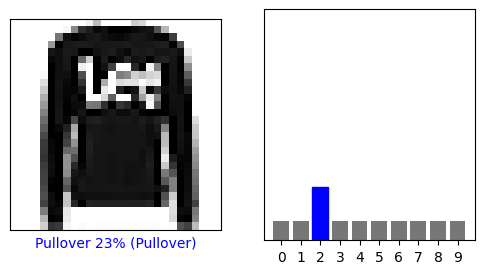

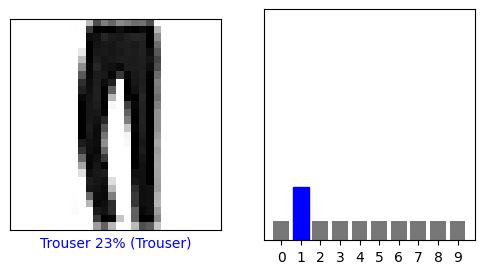

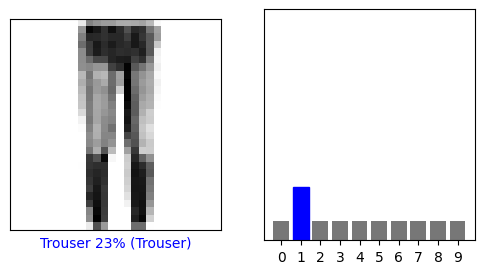

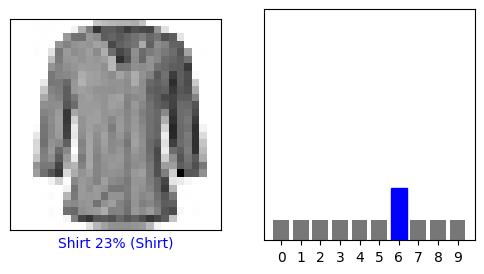

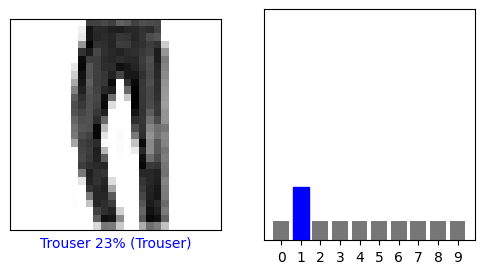

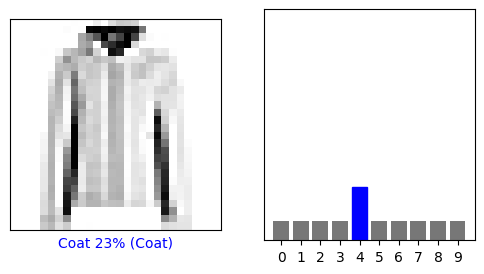

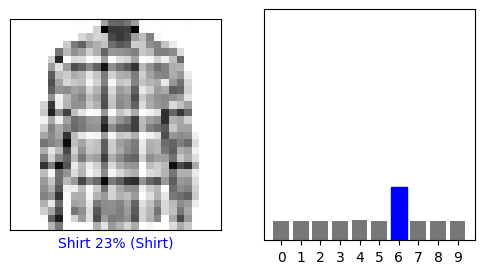

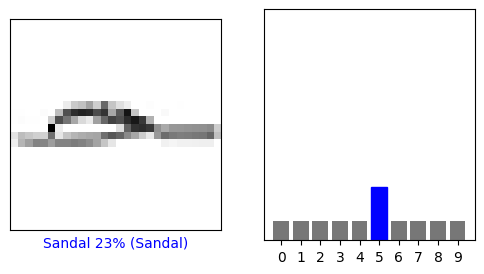

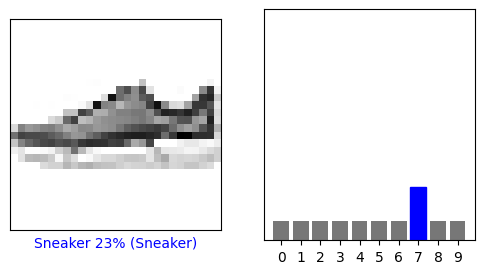

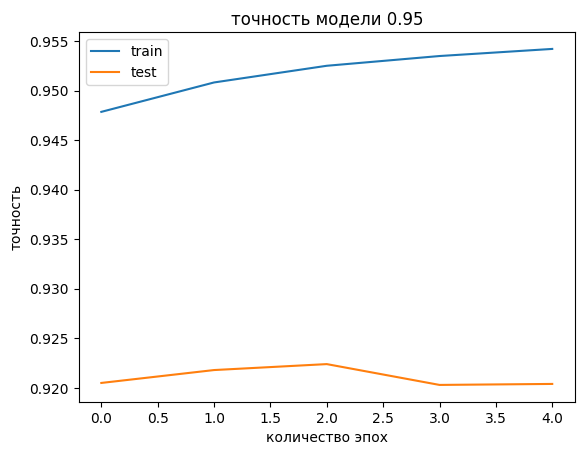

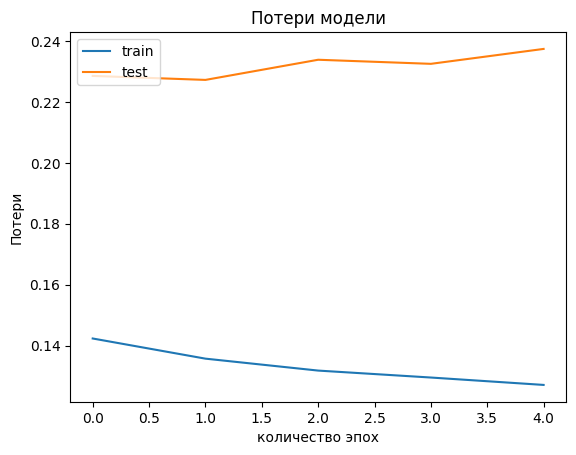

In [ ]:
probability_show(tf.keras.Sequential([model_3, tf.keras.layers.Softmax()]).predict(x_test), x_test)
history_show(history)

Дальнейшее увеличение сверточных слоев и эпох обучения привело к увеличению точности, но ее график на тестовых данных перестал рости, а потери наборот возрастают, что говорит о пределе возможностей данной модели

In [33]:
model_4 = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'relu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [34]:
model_4.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size = 32, epochs = 10, validation_data = (x_test, y_test_cat) )

Epoch 1/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.4282 - accuracy: 0.8440 - val_loss: 0.3295 - val_accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2714 - accuracy: 0.9004 - val_loss: 0.2888 - val_accuracy: 0.8960
Epoch 3/10
1875/1875 [==============================] - 93s 50ms/step - loss: 0.2273 - accuracy: 0.9164 - val_loss: 0.2580 - val_accuracy: 0.9041
Epoch 4/10
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1981 - accuracy: 0.9262 - val_loss: 0.2471 - val_accuracy: 0.9095
Epoch 5/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.1724 - accuracy: 0.9369 - val_loss: 0.2480 - val_accuracy: 0.9132
Epoch 6/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1501 - accuracy: 0.9440 - val_loss: 0.2494 - val_accuracy: 0.9167
Epoch 7/10
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1307 - accuracy: 0.9511 - val_loss: 0.2477 -

313/313 [==============================] - 5s 16ms/step


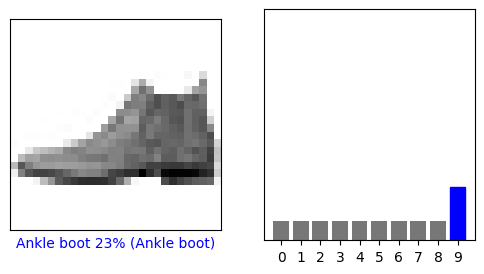

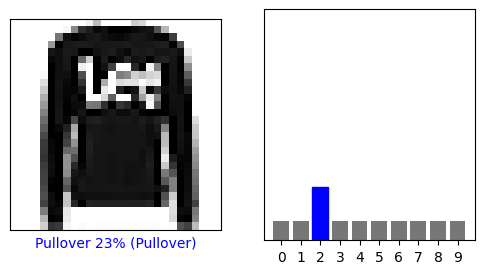

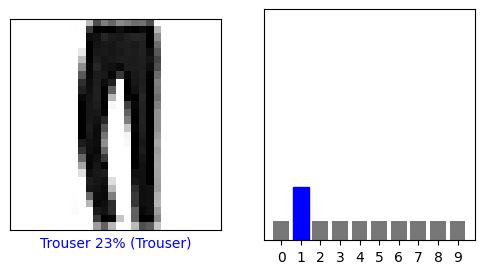

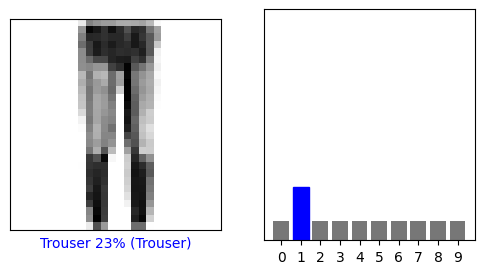

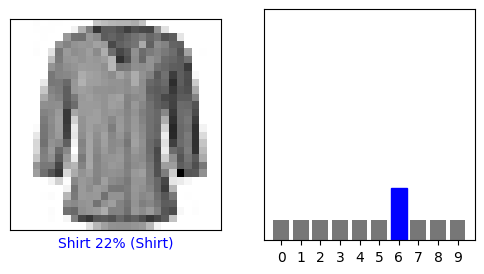

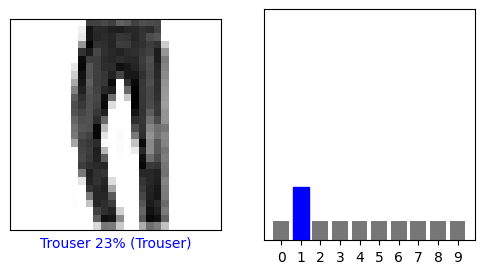

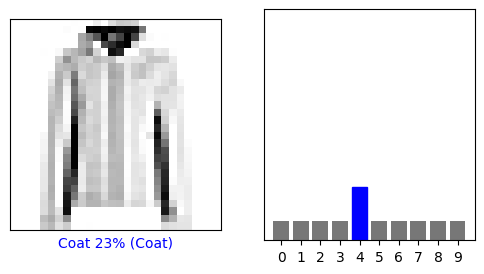

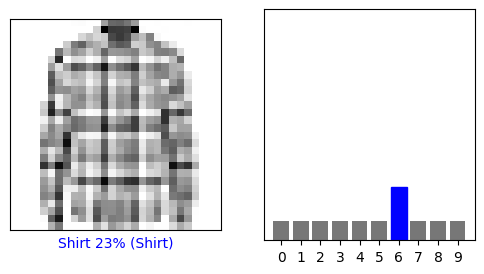

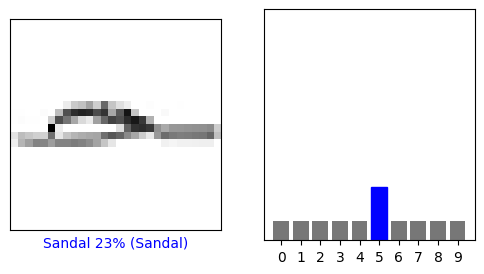

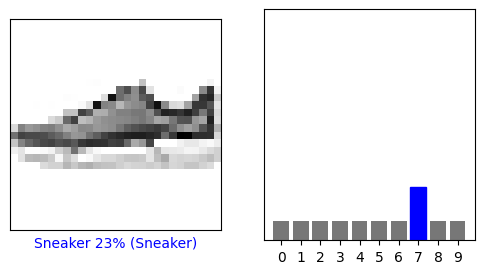

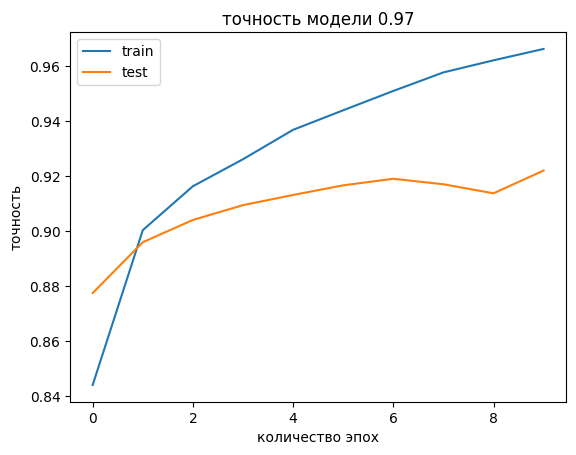

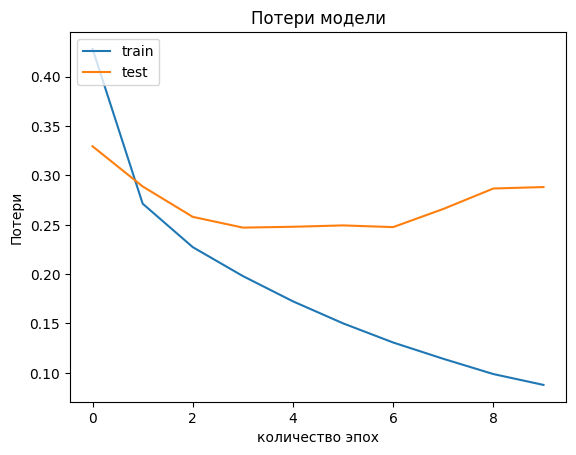

In [36]:
probability_show(tf.keras.Sequential([model_4, tf.keras.layers.Softmax()]).predict(x_test), x_test)
history_show(history)

In [37]:
model_4.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 3, 3, 128)       

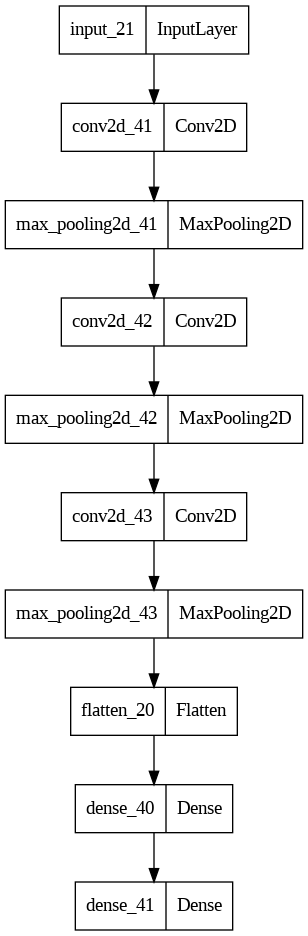

In [38]:
keras.utils.plot_model(model_4)

Пробуем добавить свою функцию активации, когда x больше нуля, выходное значение будет равно x, за исключением случаев, когда x = 0 до x = 1, где он слегка наклоняется к меньшему значению y.

In [39]:
from tensorflow.python.keras.utils import generic_utils

def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

generic_utils.get_custom_objects().update({'gelu': Activation(gelu)})

определение функции активации при, максимальном accuracy

In [15]:
models = dict()
function = ['sigmoid', 'relu', 'elu', 'selu', 'gelu']
for activation in function:
  models[activation] =  keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = activation ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = activation ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(50,activation = activation), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

result = list()
for key, model in models.items():
  print(key)
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  history = model.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_data = (x_test, y_test_cat) )
  predict = tf.keras.Sequential([model, tf.keras.layers.Softmax()]).predict(x_test)

  result.append((max(history.history["accuracy"]), history, predict))

sigmoid
Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.8402 - accuracy: 0.7011 - val_loss: 0.4995 - val_accuracy: 0.8173
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.4488 - accuracy: 0.8369 - val_loss: 0.4245 - val_accuracy: 0.8439
Epoch 3/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3872 - accuracy: 0.8579 - val_loss: 0.3823 - val_accuracy: 0.8586
Epoch 4/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3500 - accuracy: 0.8716 - val_loss: 0.3802 - val_accuracy: 0.8619
Epoch 5/5
313/313 [==============================] - 4s 12ms/step
relu
Epoch 1/5
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4324 - accuracy: 0.8454 - val_loss: 0.3351 - val_accuracy: 0.8810
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2848 - accuracy: 0.8975 - val_loss: 0.2934 - val_accuracy: 0.8950
Epoch 3/5
1875/1875 [==============================

максимальная точность получена на функции selu


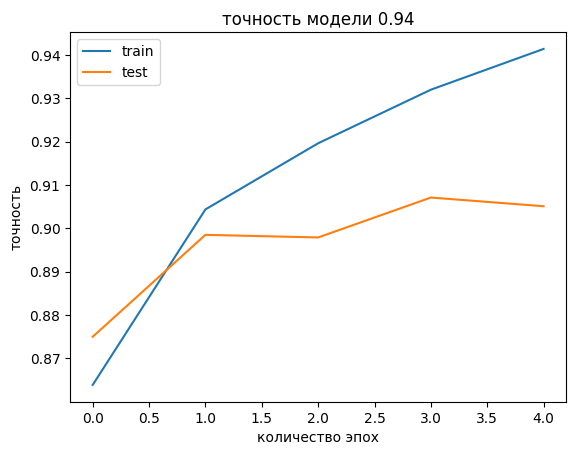

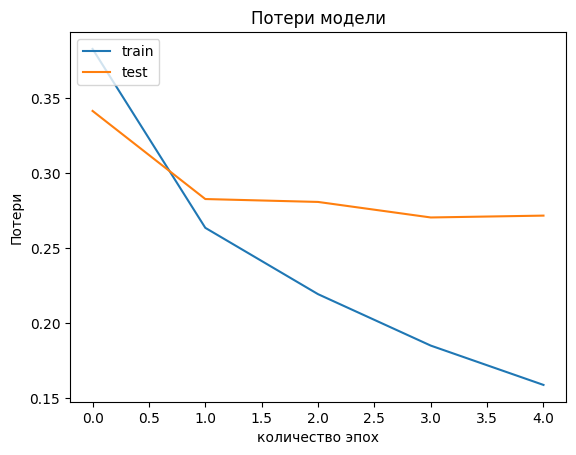

In [17]:
index = np.argmax(list(zip(*result))[0])
print(f"максимальная точность получена на функции {function[index]}")
history_show(result[index][1])

Пробуем применить оптимальную функцию активации

In [40]:
model = keras.Sequential([
      keras.Input(shape=input_shape),
      Conv2D(32, padding = 'same', kernel_size = (3,3), activation = 'selu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'selu' ),
      MaxPooling2D( (2,2), strides = 2),
      Conv2D(128, padding = 'same', kernel_size = (3,3), activation = 'selu' ),
      MaxPooling2D( (2,2), strides = 2),
      Flatten(), # перевод в одномерный массив
      Dense(128,activation = 'selu'), # количество входных нейронов
      Dense(10, activation = 'softmax')   # количество выходных нейронов
      ] )

In [41]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
%%time

history = model.fit(np.concatenate([x_train, x_test]), np.concatenate([y_train_cat, y_test_cat]), batch_size = 32, epochs = 10, validation_data = (x_test, y_test_cat) )

Epoch 1/10
2188/2188 [==============================] - 117s 53ms/step - loss: 0.1186 - accuracy: 0.9608 - val_loss: 0.1745 - val_accuracy: 0.9447
Epoch 2/10
2188/2188 [==============================] - 132s 60ms/step - loss: 0.0867 - accuracy: 0.9689 - val_loss: 0.1160 - val_accuracy: 0.9595
Epoch 3/10
2188/2188 [==============================] - 131s 60ms/step - loss: 0.0779 - accuracy: 0.9716 - val_loss: 0.0837 - val_accuracy: 0.9691
Epoch 4/10
2188/2188 [==============================] - 138s 63ms/step - loss: 0.0707 - accuracy: 0.9743 - val_loss: 0.0774 - val_accuracy: 0.9728
Epoch 5/10
2188/2188 [==============================] - 128s 59ms/step - loss: 0.0662 - accuracy: 0.9767 - val_loss: 0.0691 - val_accuracy: 0.9752
Epoch 6/10
2188/2188 [==============================] - 132s 60ms/step - loss: 0.0593 - accuracy: 0.9791 - val_loss: 0.0676 - val_accuracy: 0.9768
Epoch 7/10
2188/2188 [==============================] - 130s 60ms/step - loss: 0.0606 - accuracy: 0.9789 - val_loss: 0

313/313 [==============================] - 6s 17ms/step


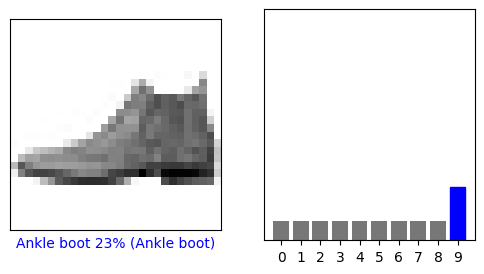

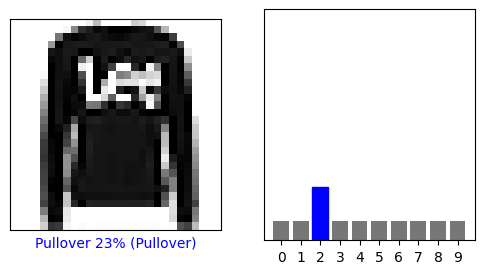

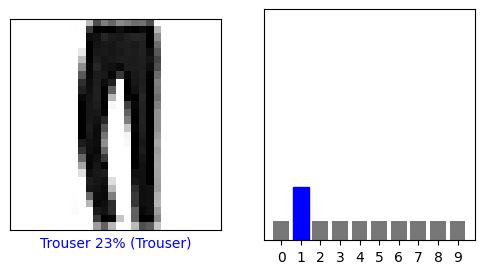

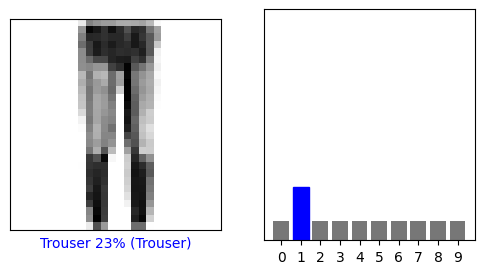

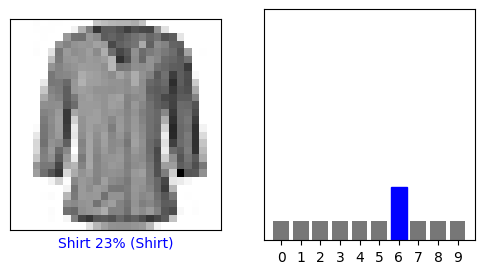

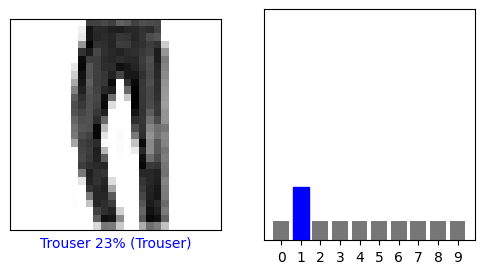

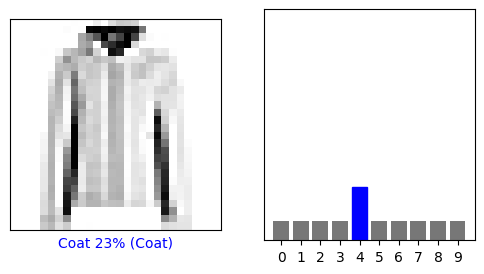

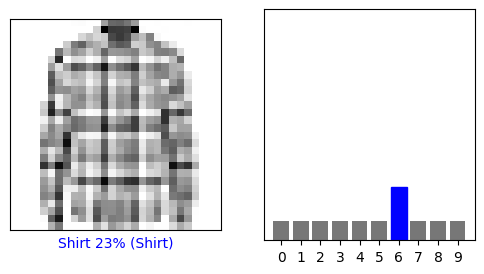

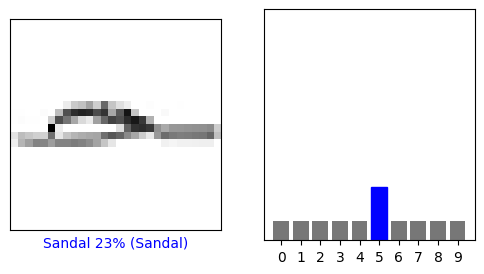

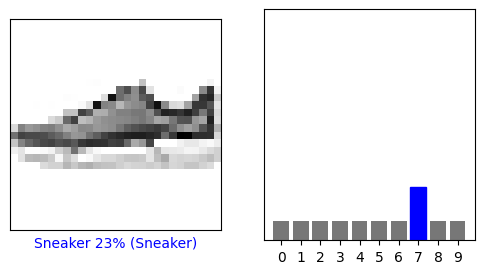

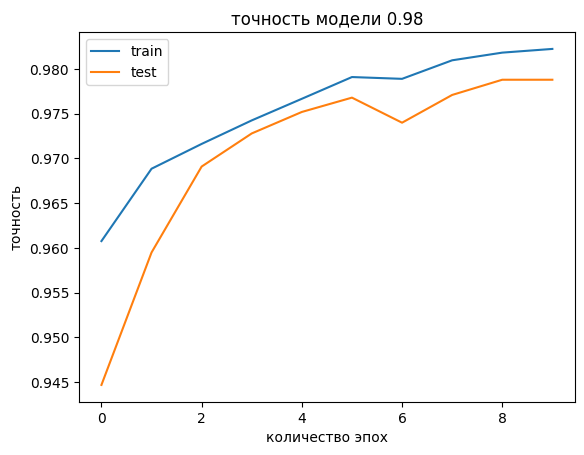

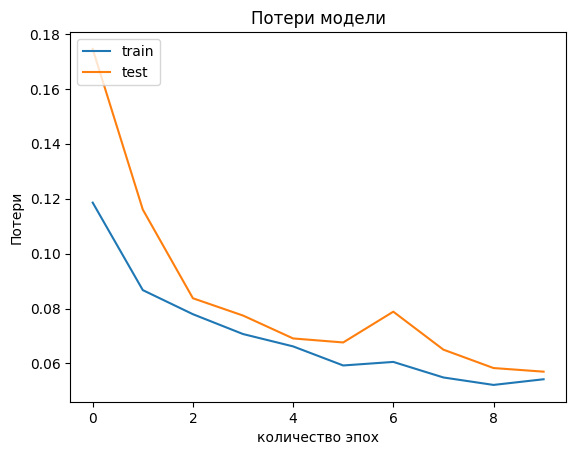

In [45]:
probability_show(tf.keras.Sequential([model, tf.keras.layers.Softmax()]).predict(x_test), x_test)
history_show(history)